## Data Preprocess (MNIST)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

### 1. 데이터 불러오기
- TensorFlow에서 제공해주는 데이터셋(MNIST) 예제 불러오기 

In [2]:
from tensorflow.keras import datasets

- 데이터 shape 확인하기

In [3]:
mnist = datasets.mnist

In [4]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [5]:
train_x.shape #28*28 이미지가 6만개 있다는 의미

(60000, 28, 28)

### 2. Image Dataset 들여다보기

- 불러온 데이터셋에서 이미지 데이터 하나만 뽑아서 시각화까지 확인

In [6]:
# 데이터 하나만 뽑기
image = train_x[4]
image.shape

(28, 28)

- 시각화해서 확인

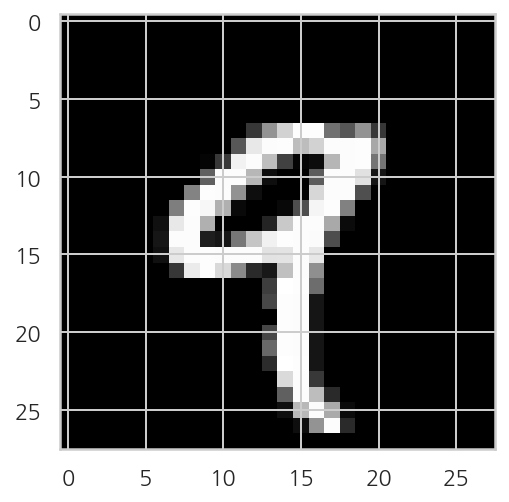

In [7]:
plt.imshow(image, 'gray')
plt.show()

### 3. Channel 관련

[Batch Size, Height, Width, Channel]  
GrayScale이면 1, RGB이면 3으로 만들어줘야함

- 다시 shape로 데이터 확인

In [8]:
train_x.shape

(60000, 28, 28)

- 데이터 차원수 늘리기 (numpy)

In [9]:
new_train_x = np.expand_dims(train_x, -1) # -1: 맨뒤에 붙인다는 의미, 0: 맨앞에 붙임
new_train_x.shape

(60000, 28, 28, 1)

- TensorFlow 패키지 불러와 데이터 차원수 늘리기 (tensorflow)

In [10]:
new_train_x = tf.expand_dims(train_x, -1)
new_train_x.shape

TensorShape([60000, 28, 28, 1])

- tf.newaxis 사용해서 데이터 차원수 늘리기(TensorFlow 공홈에서 가져온 방법)

In [11]:
train_x.shape

(60000, 28, 28)

In [12]:
train_x[..., tf.newaxis].shape

(60000, 28, 28, 1)

In [13]:
reshaped = train_x.reshape([60000, 28, 28, 1])
reshaped.shape

(60000, 28, 28, 1)

*주의 사항  
matplotlib로 이미지 시각화 할 때는 gray scale의 이미지는 3번쨰 dimension이 없으므로,  
2개의 dimension으로 gray scale로 차원 조절해서 넣어줘야함

- new_train_x[0] -> new_train_x[0, :, :, 0]

In [14]:
new_train_x = train_x[..., tf.newaxis]
new_train_x.shape

(60000, 28, 28, 1)

In [15]:
disp = new_train_x[4]
disp.shape

(28, 28, 1)

In [16]:
#plt.imshow(disp, 'gray') 
#plt.show()
# 차원이 안맞아서 에러남. 시각화할때는 위의 차원에서 1이 있으면 안됨. disp의 shape을 2차원으로 줄여줘야 함.

In [17]:
np.squeeze(new_train_x[4]).shape

(28, 28)

In [18]:
disp = np.squeeze(new_train_x[4])
disp.shape

(28, 28)

- 다시 시각화

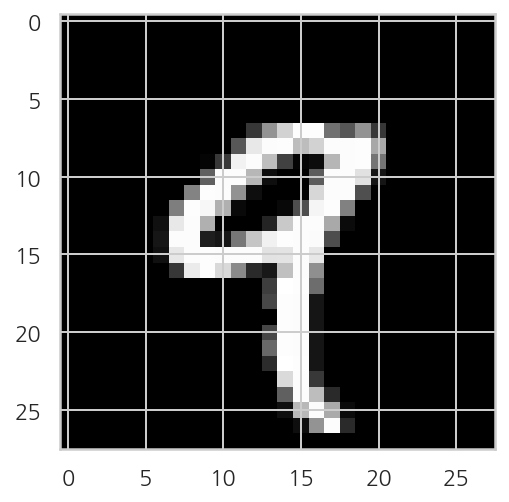

In [19]:
plt.imshow(disp, 'gray')
plt.show()

### 4. Label Dataset 들여다보기  

- Label 하나를 열어서 Image와 비교하여 제대로 들어갔는지. 어떤 식으로 저장 되어있는지 확인

- label 하나만 뽑아보기

In [20]:
train_y.shape

(60000,)

In [21]:
train_y[4]

9

- Label 시각화 

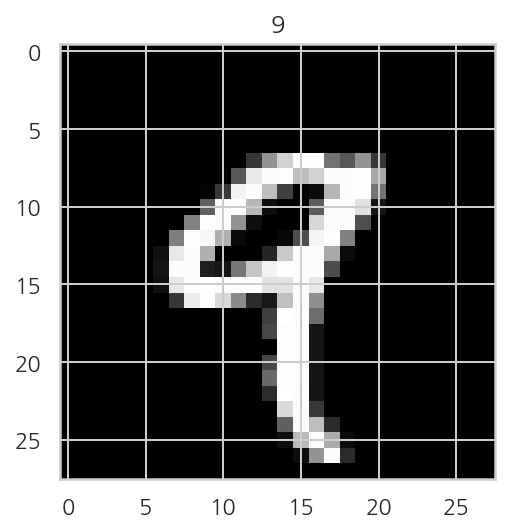

In [22]:
plt.title(train_y[4])
plt.imshow(train_x[4], 'gray')
plt.show()

### 5. OneHot Encoding



- 컴퓨터가 이해할 수 있는 형태로 변환해서 Label을 주도록 함

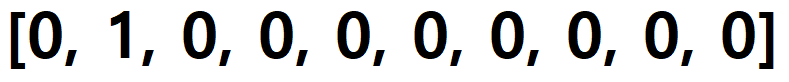

In [23]:
# 5
[0,0,0,0,0,1,0,0,0,0]

# 9
[0,0,0,0,0,0,0,0,0,1]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

- tensorflow.keras.utils.to_categorical

In [24]:
from tensorflow.keras.utils import to_categorical

- 5을 예시로 one hot encoding

In [25]:
to_categorical(9, 10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

- label 확인해서 to_categorical 사용

In [26]:
label = train_y[4]
label

9

In [27]:
label_onehot = to_categorical(label, num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

- onehot encoding으로 바꾼 것과 이미지 확인

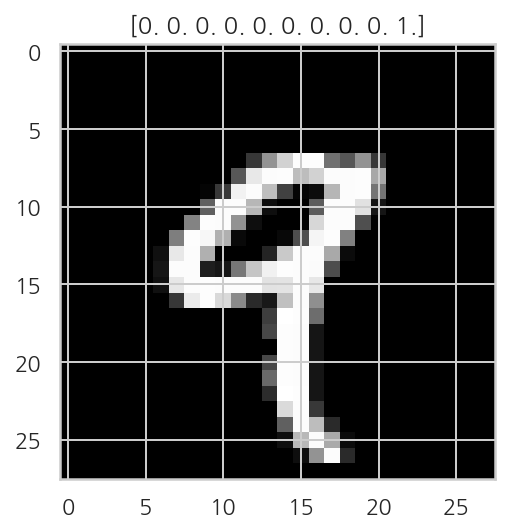

In [28]:
plt.title(label_onehot)
plt.imshow(train_x[4], 'gray')
plt.show()